## Text Analytics - Knowledge Graph, BERT, spaCy, NLTK - Notebook 01

This noteboook covers some cool language modeling and natural language processing tools and methods.

References: \
https://www.ibm.com/topics/knowledge-graph \
https://www.kaggle.com/code/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk 

<b>Key phases of NLP over history:</b>
>1. Machine Translation Phase [Late 1940s to Late 1960s]
2. AI Influenced Phase [Late 1960s to Late 1970s]
3. Grammatico-Logical Phase [Late 1970s to Late 1980s]
4. Lexical & Corpus Phase [The 1990s]

<b>Types Ambiguitiy & Uncertainity in Language</b>
1. <b>Lexical Ambiguity</b>: The ambiguity of a single word is called lexical ambiguity. For example, treating the word silver as a noun, an adjective, or a verb.

2. <b>Syntactic Ambiguity</b>: This kind of ambiguity occurs when a sentence is parsed in different ways. For example, the sentence “The man saw the girl with the telescope”. It is ambiguous whether the man saw the girl carrying a telescope or he saw her through his telescope.

3. <b>Semantic Ambiguity</b>: This kind of ambiguity occurs when the meaning of the words themselves can be misinterpreted. In other words, semantic ambiguity happens when a sentence contains an ambiguous word or phrase. For example, the sentence “The car hit the pole while it was moving” is having semantic ambiguity because the interpretations can be “The car, while moving, hit the pole” and “The car hit the pole while the pole was moving”.

4. <b>Anaphoric Ambiguity</b>: This kind of ambiguity arises due to the use of anaphora entities in discourse. For example, the horse ran up the hill. It was very steep. It soon got tired. Here, the anaphoric reference of “it” in two situations cause ambiguity.

5. <b>Pragmatic Ambiguity</b>: Such kind of ambiguity refers to the situation where the context of a phrase gives it multiple interpretations. In simple words, we can say that pragmatic ambiguity arises when the statement is not specific. For example, the sentence “I like you too” can have multiple interpretations like I like you (just like you like me), I like you (just like someone else dose).

<b>Logical Steps in NLP:</b> 

1. <u>Input Sentence</u> 
2. <u>Morphological Processing</u>  --> break chunks of language input into sets of tokens corresponding to paragraphs, sentences and words 
3. <u>Syntax Analysis</u>  [Lexicon, Grammar] --> to check that a sentence is well formed or not and to break it up into a structure that shows the syntactic relationships between the different words
4. <u>Semantic Analysis</u>  [Semantic Rules] --> draw exact meaning, or you can say dictionary meaning from the text. The text is checked for meaningfulness. 
5. <u>Pragmatic Analysis</u>  [Contextual Information] --> Pragmatic analysis simply fits the actual objects/events, which exist in a given context with object references obtained during pragmatic analysis
6. <u>Target Representation</u> 

Finally, moving onto Knowledge Graph & using the NLP libraries in Python (BERT, spaCy, NLTK) & some conceptual details behind their implementation: 

### Knowledge Graph 

<b><i>What is a Knowledge Graph?</i></b>
>A knowledge graph, also known as a semantic network, represents a network of real-world entities—i.e. objects, events, situations, or concepts—and illustrates the relationship between them. \
\
A knowledge graph is made up of three main components: nodes, edges, and labels. Any object, place, or person can be a node. An edge defines the relationship between the nodes. For example, a node could be a client, like IBM, and an agency like, Ogilvy. An edge would be categorize the relationship as a customer relationship between IBM and Ogilvy.

Knowledge graphs, that are fueled by machine learning, utilize natural language processing (NLP) to construct a comprehensive view of nodes, edges, and labels through a process called semantic enrichment. When data is ingested, this process allows knowledge graphs to identify individual objects and understand the relationships between different objects. 

<b><i>Use Cases of Knowledge Graphs:</i></b>

There are a number of popular, consumer-facing knowledge graphs, which are setting user expectations for search systems across enterprises. Some of these knowledge graphs include:

DBPedia and Wikidata are two different knowledge graphs for data on Wikipedia.org. DBPedia is comprised of data from the infoboxes of Wikipedia while Wikidata focuses on secondary and tertiary objects. Both typically publish in a RDF format.  

Google Knowledge Graph is represented through Google Search Engine Results Pages (SERPs), serving information based on what people search. This knowledge graph is comprised of over 500 million objects, sourcing data from Freebase, Wikipedia, the CIA World Factbook, and more.

<b>Building a Knowledge Graph from Text:</b>

Manually building a knowledge graph is not scalable. Nobody is going to go through thousands of documents and extract all the entities and the relations between them! That’s why machines are more suitable to perform this task as going through even hundreds or thousands of documents is child’s play for them. But then there is another challenge – machines do not understand natural language. This is where Natural Language Processing (NLP) comes into the picture. To build a knowledge graph from the text, it is important to make our machine understand natural language. This can be done by using NLP techniques such as sentence segmentation, dependency parsing, parts of speech tagging, and entity recognition.

In [2]:
# !pip3 install spacy
# !python3 -m spacy download en_core_web_sm

2023-03-21 17:23:37.120817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl#egg=en_core_web_sm==3.4.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.4 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


<b>Importing the required libraries:</b>

In [4]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
from spacy.tokens import Span

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

<b>Importing Wikipedia sentences:</b>

In [5]:
candidate_sentences = pd.read_csv("wiki_sentences_v2.csv")
candidate_sentences.shape

(4318, 1)

In [8]:
candidate_sentences['sentence'].sample(3)

4035                                                                               nandi means bull
687                                                                            debbie does dallas .
3351    the farabi cinema foundation then stepped in to try and reassemble the disorganized cinema.
Name: sentence, dtype: object

<b>Sentence Segmentation:</b>\
First step in building a knowledge graph is to split text into sentences and select the sentences with exactly 1 subject and 1 object.

In [12]:
doc = nlp("Ruchi Sharma is a student at The University of Texas at Austin")
for tok in doc:
    print(tok.text, "=", tok.dep_)

Ruchi = compound
Sharma = nsubj
is = ROOT
a = det
student = attr
at = prep
The = det
University = pobj
of = prep
Texas = pobj
at = prep
Austin = pobj


<b>Entities Extraction:</b>\
Extracting single word entity from a sentence can be done with parts of speech (POS) tagging. However, when entity spans across multiple words, POS tags alone are not sufficient. We need to parse the dependency tree of the sentence. 

To build a knowledge graph, the most important things are the nodes and the edges between them. These nodes are going to be the entities that are present in the Wikipedia sentences. Edges are the relationships connecting these entities to one another. We will extract these elements in an unsupervised manner, i.e., we will use the grammar of the sentences.

The main idea is to go through a sentence and extract the subject and the object as and when they are encountered. However, there are a few challenges ⁠— an entity can span across multiple words, eg., “red wine”, and the dependency parsers tag only the individual words as subjects or objects. So, we can create a function just to extract the subject and the object (entities) from a sentence while also overcoming the challenges mentioned above.

In [21]:
def get_entities(sent):
    
    # chunk 01
    
    ent1, ent2 = "", ""
    
    # dependency tag of previous token in the sentence
    prv_tok_dep = ""
    
    # previous token in the sentence
    prv_tok_text = ""
    
    prefix, modifier = "", ""
    
    for tok in nlp(sent):
        
        # chunk 02
        
        # if token is a punctuation mark then move on the next token 
        if tok.dep_ != "punct":
            
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                
                # if previous word was also compound then add current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text
                    
            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                
            # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " "+ tok.text
                
            # chunk 03 
            
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " "+prefix+" "+tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""
            
            # chunk 04
            
            if tok.dep_.find("obj") == True:
                ent2 = modifier+" "+prefix+" "+tok.text
                
            # chunk 05
            
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
            
    return [ent1.strip(), ent2.strip()]

In [22]:
# testing the function
get_entities("Ruchi had 3 cups of coffee today.")

['Ruchi', '3  coffee']

In [23]:
# using the function to extract entity pairs for all sentences in the data
entity_pairs = []

for i in tqdm(candidate_sentences['sentence']):
    entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████| 4318/4318 [00:32<00:00, 134.60it/s]


In [25]:
# looking at few of the subject-object pairs obtained
entity_pairs[25:30]

[['album', 'digitally  august'],
 ['film', 'studios motion pictures'],
 ['it', '$ 103.7 million'],
 ['stars kyle chandler', "o'shea jackson o'shea ."],
 ['it', 'executive producer yoshimitsu banno']]

In [26]:
# some problematic pairs, "it" doesn't signify any meaning, better to have proper nouns
# so we could possibly improve the function to filter out the pronouns

<b>Relations Extraction</b> \
To build a knowledge graph, we need edges to connect the nodes (entities) to one another. These edges are the relations between a pair of nodes. Our hypothesis is that the predicate is actually the main verb in a sentence.

For example, in the sentence – “Sixty Hollywood musicals were released in 1929”, the verb is “released in” and this is what we are going to use as the predicate for the triple generated from this sentence. Using spaCy's rule-based matching to create a function that captures predicates from the sentences. 

The pattern defined in the function below tries to find the ROOT word or the main verb in the sentence. Once the ROOT is identified, then the pattern checks whether it is followed by a preposition (‘prep’) or an agent word. If yes, then it is added to the ROOT word.

In [36]:
def get_relation(sent):
    doc = nlp(sent)
    
    # matcher class object
    matcher = Matcher(nlp.vocab)
    
    # define the pattern
    pattern = [{'DEP': 'ROOT'},
               {'DEP': 'prep', 'OP': '?'},
               {'DEP': 'agent', 'OP': '?'},
               {'POS': 'ADJ', 'OP': '?'}]
    
    matcher.add("matching_1", [pattern]) 
    
    matches=matcher(doc)
    k=len(matches)-1
    span=doc[matches[k][1]:matches[k][2]]
    
    return(span.text)

In [37]:
get_relation("Ruchi had 3 cups of coffee today.")

'had'

In [38]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████████████████████████████████| 4318/4318 [00:34<00:00, 126.81it/s]


In [39]:
pd.Series(relations).value_counts()[:50]

is               364
was              299
released on       88
include           72
are               70
were              65
released          41
's                37
composed by       32
became            31
have              31
has               30
become            28
released in       27
included          23
called            21
produced          21
had               20
made              20
been              20
considered        20
be                18
used              18
scheduled         17
directed by       16
stars             16
received          15
wrote             14
hired             14
produced by       14
written by        13
introduced in     13
went              13
wanted            12
won               11
began             11
set               11
began in          11
includes          10
gave              10
directed          10
sold              10
gives              9
shot in            9
opened             9
cast as            9
known as           9
features     

<b>Building the Knowledge Graph</b>

In [41]:
# df of entities (subject-object) and predicates (relation bw entities)

# subject
source=[i[0] for i in entity_pairs]

# object
target=[i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source': source, 'target': target, 'edge': relations})

In [42]:
# using networkx to create network from df
# this will be a directed graph, relation bw any connected node pair is not two-way, it is only one node to another

G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr = True, 
                                   create_using = nx.MultiDiGraph())

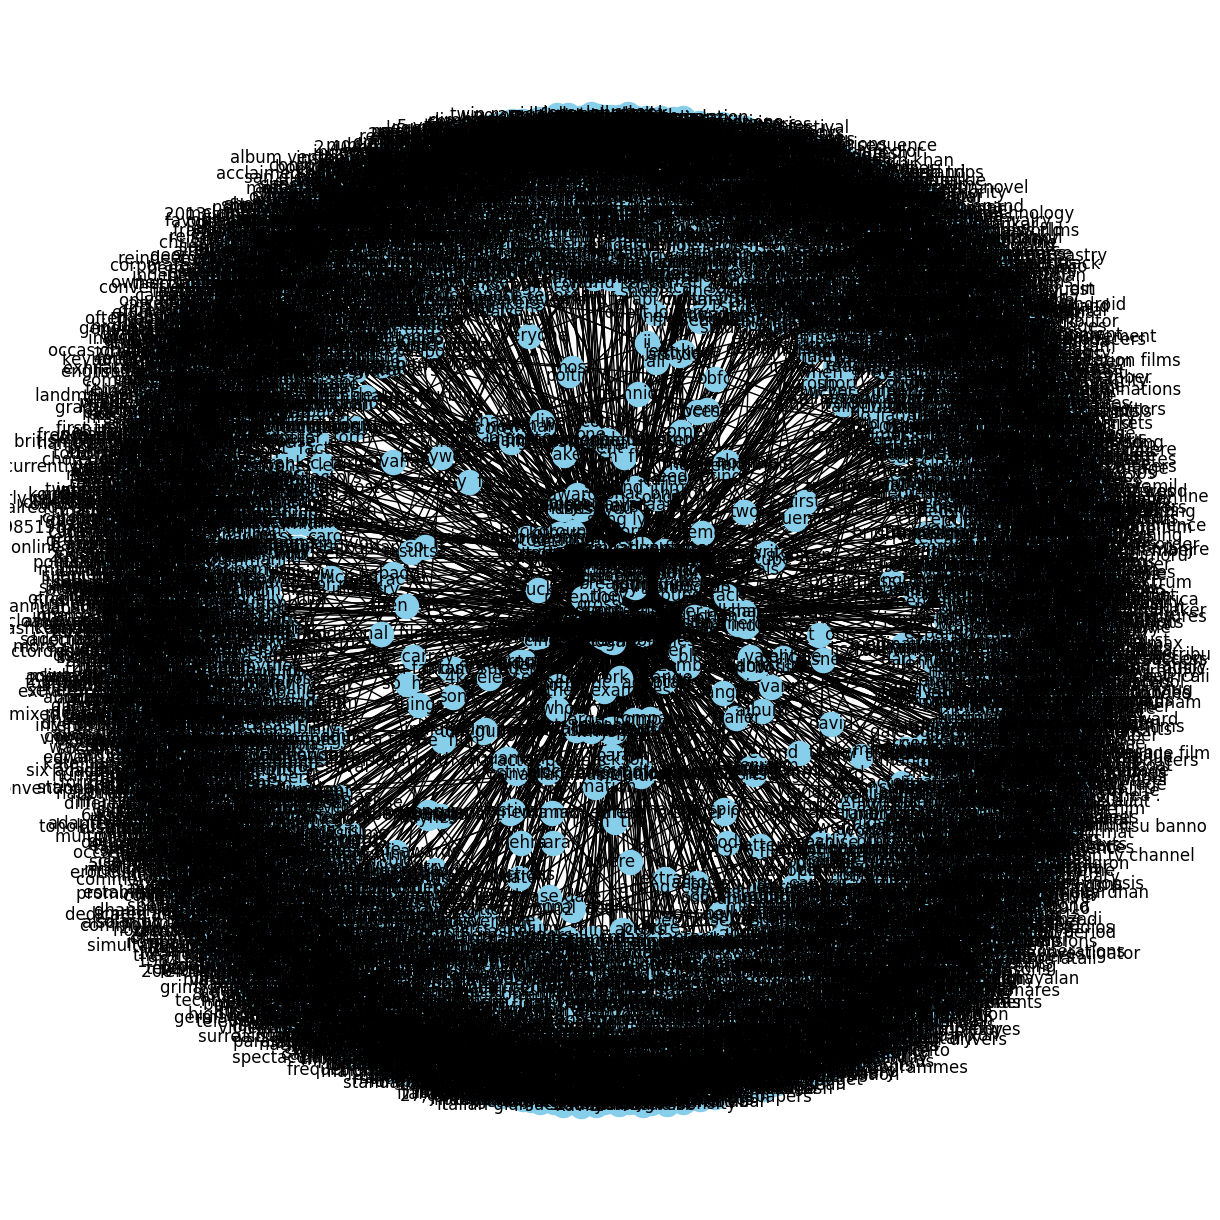

In [43]:
#plot the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

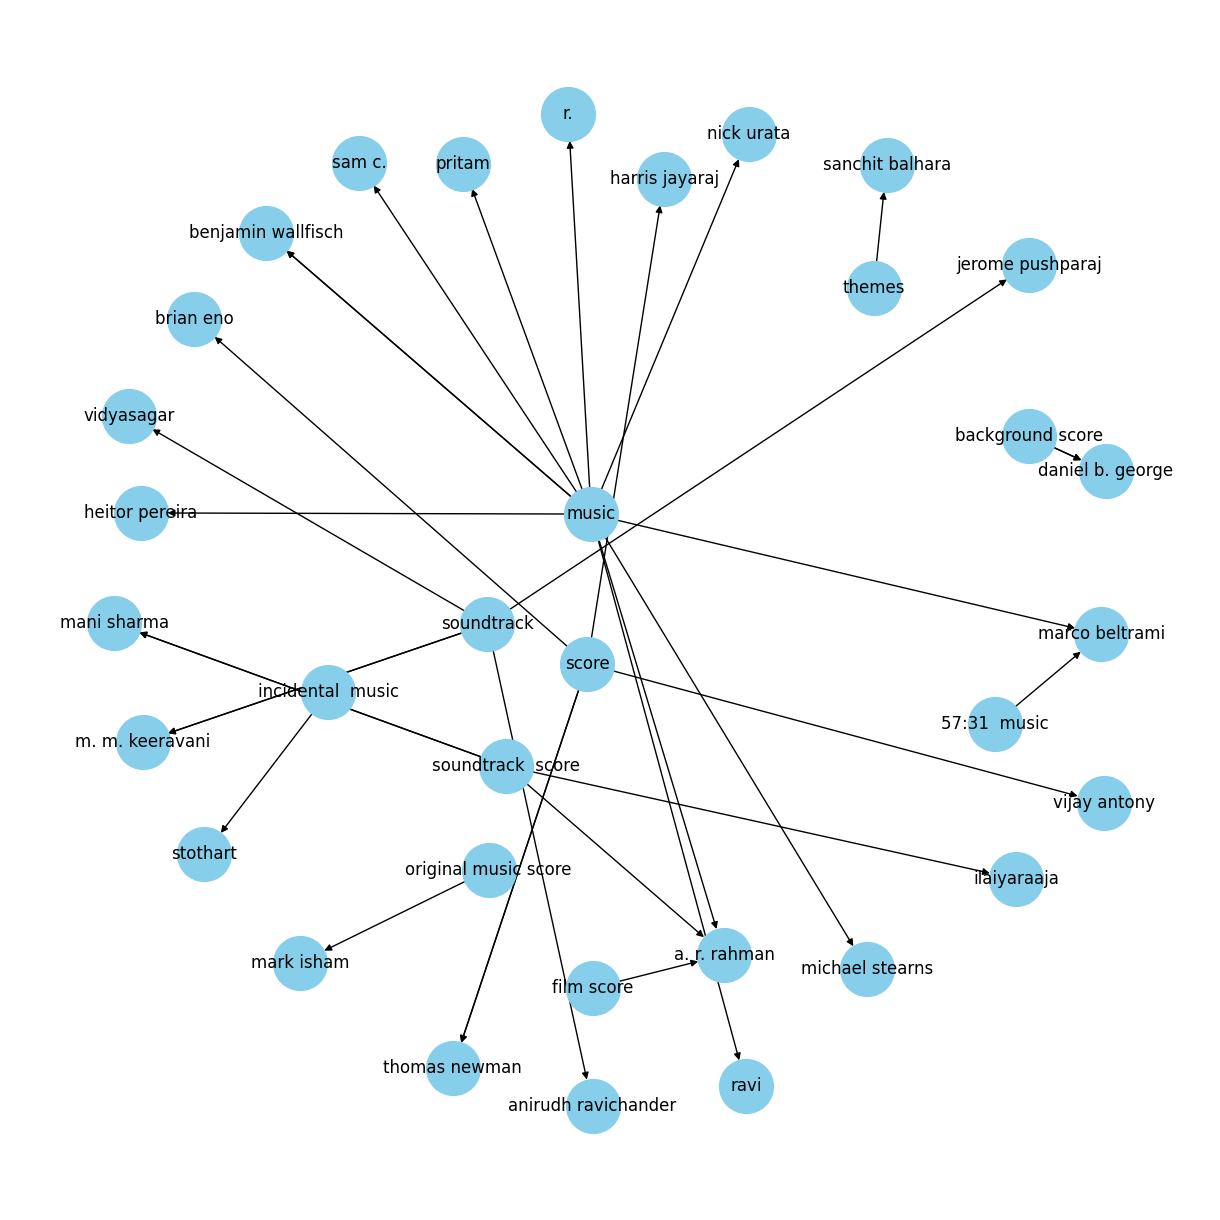

In [44]:
# let's rather plot the graphs for some relations
# for "composed by"

G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], 
                "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

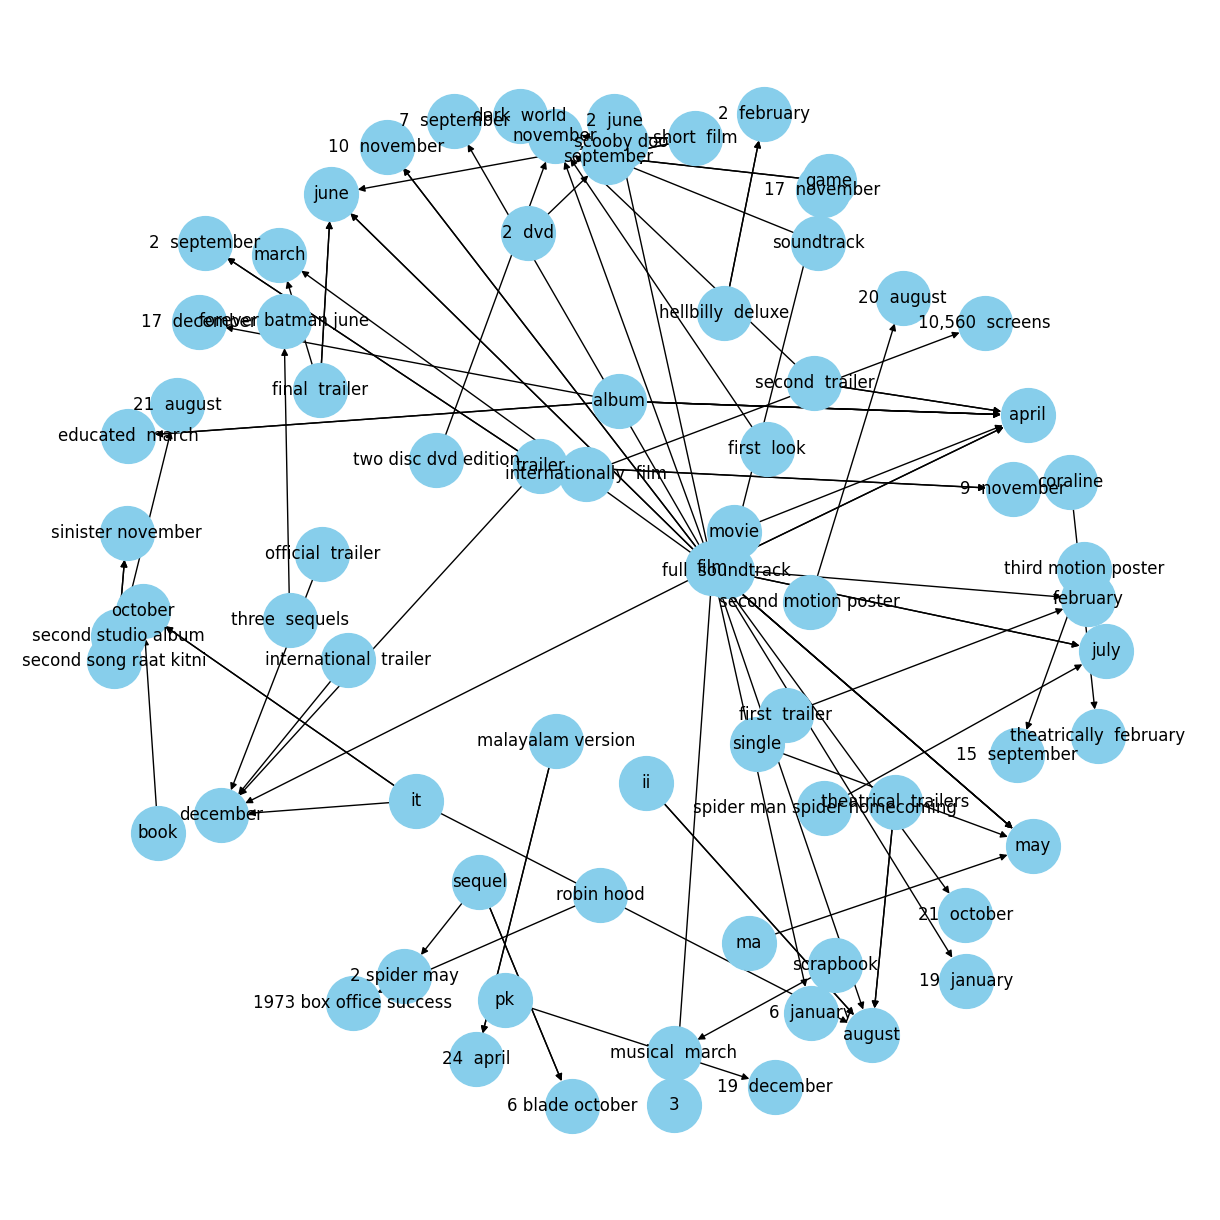

In [46]:
# for "released on"  

G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released on"], 
                "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

This was some implementation of building graph for a text document. The next part is continued in the next notebook.